In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import time
import matplotlib.pyplot as plt
import lsst.meas.base
import lsst.pex.config

import lsst.afw.table
import lsst.meas.algorithms
import lsst.pex.exceptions
import lsst.meas.extensions.gaap

In [2]:
from astropy.io import fits
from astropy.table import Table, hstack
import sys
sys.path.append('/home/jiaxuanl/Research/Merian/merian_tractor/scripts/')

get existing patches

In [3]:
import os
old_patches = [name for name in os.listdir(
    "/projects/MERIAN/repo/S20A/deepCoadd_calexp/9813/")]
new_patches = [int(name[0]) + int(name[2]) * 9 for name in old_patches]
merian_patches = [int(name) for name in os.listdir(
    "/projects/MERIAN/repo/DECam/runs/merian/dr1_wide/20220921T193246Z/deepCoadd_forced_src/9813")]
common_patches = np.intersect1d(new_patches, merian_patches)

rsync -azv --progress jiaxuanl@tiger.princeton.edu://projects/MERIAN/repo/S20A/gaapTable/9813/6,2/gaapTable_I_9813_6,2.fits ./

In [11]:
common_patches[20:23]

array([23, 24, 25])

In [4]:
from hsc_gaap.gaap import GaapTask, consolidateMerianCats, NaiveLogger

Overriding default configuration file with /projects/HSC/LSST/stack_20220527/conda/envs/lsst-scipipe-4.1.0/share/eups/Linux64/dustmaps_cachedata/g41a3ec361e+62d12e78cb/config/.dustmapsrc


In [5]:
gaap = GaapTask(9813, 79, 'grizy', 
                hsc_type='S20A',
                repo='/projects/MERIAN/repo/', 
                collections='S20A/deepCoadd_calexp', 
                log_level='INFO', logger=NaiveLogger(None))

# gaap = GaapTask(9813, 11, 'i', hsc_type='w_2022_40',
#                 repo='/projects/HSC/repo/main',
#                 collections='HSC/runs/RC2/w_2022_40/DM-36151')
# gaap = GaapTask(9813, 11, 'gr', hsc_type='w_2022_04',
#                             repo='/projects/MERIAN/repo/',
#                             collections='HSC/runs/RC2/w_2022_04/DM-33402')

gaap.load_merian_reference(band='N708', 
                           repo='/projects/MERIAN/repo/', 
                           collections='DECam/runs/merian/dr1_wide',
#                            range=(0, 100)
                          )

In [6]:
gaap.setDefaultMeasureConfig()

In [9]:
import lsst.daf.butler as dafButler

In [11]:
butler = dafButler.Butler("/projects/MERIAN/repo")

skymap = butler.get("skyMap", skymap="hsc_rings_v1", collections="skymaps")

tract = skymap.generateTract(9813)

In [7]:
gaap.runAll()

14:16:59, GaapMaster: INFO     - Patch 79: Generating ForcedPhotCoadd catalog for g band
/projects/HSC/LSST/stack_20220527/conda/envs/lsst-scipipe-4.1.0/share/eups/Linux64/scarlet/g9f0f391e47+4083830bf8/lib/python/scarlet/lite/measure.py:85: RuntimeWarning: divide by zero encountered in true_divide
  ratio = numerator / denominator
/projects/HSC/LSST/stack_20220527/conda/envs/lsst-scipipe-4.1.0/share/eups/Linux64/scarlet/g9f0f391e47+4083830bf8/lib/python/scarlet/lite/measure.py:85: RuntimeWarning: invalid value encountered in true_divide
  ratio = numerator / denominator
14:19:19, GaapMaster: INFO     - Patch 79: Running ForcedPhotCoaddTask on g band


# Starting the GAaP measureTask for patch=79, band=g at Fri Dec 16 14:19:19 2022


14:19:19, lsst.forcedPhotCoadd.measurement: INFO Performing forced measurement on 31425 sources


KeyboardInterrupt: 

In [15]:
len(gaap.objectTable)

31425

In [9]:
gaap.writeObjectTable();
gaap.transformObjectCatalog(
    functorFile='/home/jiaxuanl/Research/Merian/merian_tractor/scripts/hsc_gaap/Object.yaml');

In [17]:
gaap.objectTable['y_gaap0p5Flux']

objectId
3496147909164924929     572.104244
3496147909164924930    1177.962773
3496147909164924931     377.583067
3496147909164924932     138.880579
3496147909164924933      76.477673
                          ...     
3496147909164967891      13.870845
3496147909164967892     129.410061
3496147909164967893     -20.027167
3496147909164967894     150.571395
3496147909164967895      11.585934
Name: y_gaap0p5Flux, Length: 31425, dtype: float64

In [12]:
gaap.saveObjectTable()

Wrote GAaP table to /projects/MERIAN/repo/S20A/gaapTable/9813/7,8/objectTable_9813_7,8_S20A.fits


In [53]:
cat_ref = joinMerianCatPatches([23])

In [ ]:
cat_ref.write()

In [ ]:
cat_ref.write(
        f'/projects/MERIAN/repo/S20A/gaapTable/9813/5,2/MerianTable_{gaap.band.upper()}_{gaap.tract}_{gaap.patch_old}.fits')

https://pipelines.lsst.io/modules/lsst.pipe.tasks/tasks/lsst.pipe.tasks.multiBand.MeasureMergedCoaddSourcesTask.html

In [17]:
# cat2 = writeObjectTable(gaap.measCat, band='i')
cat2.remove_columns(['id', 'coord_ra', 'coord_dec'])
cat_ref = joinMerianCatPatches([23])[:15000]

In [18]:
cat = hstack([cat_ref, cat2])

/tmp/ipykernel_89880/1226182700.py:3: RuntimeWarning: invalid value encountered in log10
  plt.scatter(27 - 2.5 * np.log10(cat[flag]['i_gaap1p0Flux'].data),
/tmp/ipykernel_89880/1226182700.py:4: RuntimeWarning: invalid value encountered in log10
  -2.5 * np.log10(cat[flag]['i_gaap1p0Flux'].data / cat[flag]['N708_gaap1p0Flux']),
/tmp/ipykernel_89880/1226182700.py:7: RuntimeWarning: invalid value encountered in log10
  plt.scatter(27 - 2.5 * np.log10(cat[~flag]['i_gaap1p0Flux'].data),
/tmp/ipykernel_89880/1226182700.py:8: RuntimeWarning: invalid value encountered in log10
  -2.5 * np.log10(cat[~flag]['i_gaap1p0Flux'].data / cat[~flag]['N708_gaap1p0Flux']),


Text(0.5, 1.0, 'ref=Merian, img=HSC RC2 w40')

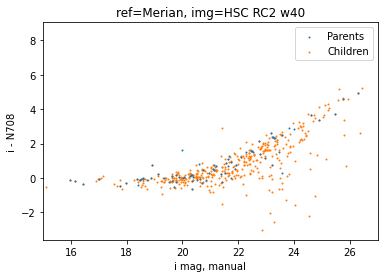

In [7]:
flag = (cat['deblend_nChild'] > 0)

plt.scatter(27 - 2.5 * np.log10(cat[flag]['i_gaap1p0Flux'].data), 
            -2.5 * np.log10(cat[flag]['i_gaap1p0Flux'].data / cat[flag]['N708_gaap1p0Flux']), 
            s=1, label='Parents', zorder=10, alpha=1)

plt.scatter(27 - 2.5 * np.log10(cat[~flag]['i_gaap1p0Flux'].data), 
            -2.5 * np.log10(cat[~flag]['i_gaap1p0Flux'].data / cat[~flag]['N708_gaap1p0Flux']), 
            s=1, alpha=1, label='Children')

plt.xlim(15, 27)
# plt.ylim(-3, 3)
leg = plt.legend()
for lh in leg.legendHandles: 
    lh.set_alpha(1)
plt.xlabel('i mag, manual')
plt.ylabel('i - N708')
plt.title('ref=Merian, img=HSC RC2 w40')

/tmp/ipykernel_92896/2198881854.py:3: RuntimeWarning: invalid value encountered in log10
  plt.scatter(27 - 2.5 * np.log10(cat[flag]['i_gaap1p0Flux'].data),
/tmp/ipykernel_92896/2198881854.py:4: RuntimeWarning: invalid value encountered in log10
  -2.5 * np.log10(cat[flag]['i_gaap1p0Flux'].data / cat[flag]['N708_gaap1p0Flux']),
/tmp/ipykernel_92896/2198881854.py:7: RuntimeWarning: invalid value encountered in log10
  plt.scatter(27 - 2.5 * np.log10(cat[~flag]['i_gaap1p0Flux'].data),
/tmp/ipykernel_92896/2198881854.py:8: RuntimeWarning: invalid value encountered in log10
  -2.5 * np.log10(cat[~flag]['i_gaap1p0Flux'].data / cat[~flag]['N708_gaap1p0Flux']),


Text(0.5, 1.0, 'ref=Merian, img=HSC RC2 w40')

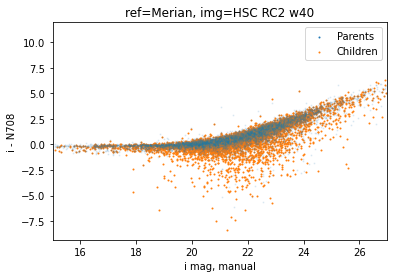

In [22]:
flag = (cat['deblend_nChild'] > 0)

plt.scatter(27 - 2.5 * np.log10(cat[flag]['i_gaap1p0Flux'].data), 
            -2.5 * np.log10(cat[flag]['i_gaap1p0Flux'].data / cat[flag]['N708_gaap1p0Flux']), 
            s=1, label='Parents', zorder=10, alpha=0.1)

plt.scatter(27 - 2.5 * np.log10(cat[~flag]['i_gaap1p0Flux'].data), 
            -2.5 * np.log10(cat[~flag]['i_gaap1p0Flux'].data / cat[~flag]['N708_gaap1p0Flux']), 
            s=1, alpha=1, label='Children')

plt.xlim(15, 27)
# plt.ylim(-3, 3)
leg = plt.legend()
for lh in leg.legendHandles: 
    lh.set_alpha(1)
plt.xlabel('i mag, manual')
plt.ylabel('i - N708')
plt.title('ref=Merian, img=HSC RC2 w40')